In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams as rc

In [3]:
rc['legend.fontsize']=18
rc['axes.titlesize']=18
rc['lines.linewidth']=2
rc['lines.markersize']=8
rc['font.size']=18
rc['legend.handletextpad']= 0.2
rc['legend.frameon']=False
rc['text.usetex']=True
#print(rc.keys)

In [4]:
def tau_p(p1,k1,Nn):
    g=0.1
    return g*Nn**2/(np.pi**2*k1*p1**2)

def MSD_Rouse(t,T1,F1,ta,Nn,k1):

    ps=np.arange(1,Nn+1,1)
    g=0.1
    tp=tau_p(ps,k1,Nn)
    val=(tp*(T1+F1**2*ta*tp**2/(g*(tp**2-ta**2)))*(1-np.exp(-t/tp))/(2*Nn*g)
        -(F1*ta*tp)**2*(1-np.exp(-t/ta))/(2*Nn*g**2*(tp**2-ta**2)))*0.5
        # *np.cos(ps*np.pi*50/Nn)**2
    # print(val.shape)
    
    ret=(6*(T1+F1**2*ta/g)*t/(Nn*g) - 6*F1**2*ta**2*(1-np.exp(-t/ta))/(Nn*g**2)
        + 24*np.sum(val))
    return ret

def MSD_Rouse_COM(t,T1,F1,ta,Nn):
    g=0.1
    ret= 6*T1*t/(Nn*g) + 6*F1**2*ta*(t-ta*(1-np.exp(-t/ta)))/(Nn*g**2)
    return ret

In [4]:
tau_p(1,3,100)
# msd=[MSD_Rouse(xx,1,1,10,100,10) for xx in ts]

33.77372788077926

10.132118364233778
10.132118364233778


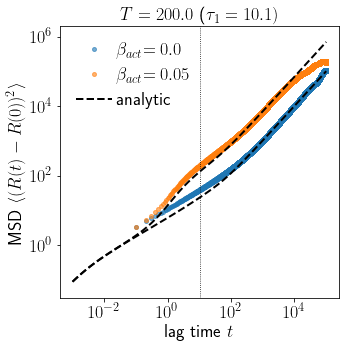

In [37]:
fig1,axes=plt.subplots(1,1,figsize=(5,5),gridspec_kw={'wspace':0.35, 'hspace':0.4})

ax1=axes

dt=0.001
bl=100
tval=np.logspace(-3,5,100)

N=100
fpath='../../data/ROUSE_chainN100_confinedR0500/'
# fpath='../../data/ROUSE_chain_confined_Ns/N300/'
ind=4
for fname in os.listdir(fpath):
    if 'MSD' in fname and 'npy' in fname and 'COM' not in fname:
        # print(fname.split('_'))
        T= float(fname.split('_')[ind].replace('T',''))
        F=float(fname.split('_')[ind+1].replace('F',''))
        Ta=float(fname.split('_')[ind+2].replace('Ta',''))
        kb=float(fname.split('_')[ind+7].replace('kb',''))
        Esoft=float(fname.split('_')[ind+3].replace('Esoft',''))
        R0=float(fname.split('_')[ind+4].replace('R0',''))
        b_act=F**2*Ta/(0.1*T)
        # print(T, F, Ta, kb)
        # if (b_act==1 or b_act>100): continue
        if R0==500 and T==200 and (F==1.0 or F==0.0) and Ta==1:
            # print(T, F, Ta, kb)
            msd=np.load(fpath+fname)
            # msd=msd['MSD']
            
            t1=tau_p(1,kb,100)


            # if F!=0:
            #     t0=T*(t1+Ta)/(F**2*(Ta+2*t1))
            #     ax1.axvline(t0,c='g')
            # ts=np.arange(0,npzfile['MSD_COM'][0].shape[0],1)*bl*dt
            ts=np.arange(0,msd.shape[0],1)*bl*dt
            print(t1)
            ax1.loglog(ts, msd, '.', label='$\\beta_{act}$'+'$={}$ '.format(b_act),alpha=0.6)
            ax1.loglog(tval,[MSD_Rouse(xx,0.0084*T,F,Ta,N,kb) for xx in tval],'k--')
            # ax1.axvline(t1*np.pi,c='k')
            
            # ax1.axhline((kb*np.pi**2*Ta/0.1)**0.5,c='k',ls=':')
            # ax1.loglog(ts, np.mean(npzfile['MSD_COM'][1:],axis=0), '.', label='$\\beta_{act}$'+'$={:.2f}$'.format(b_act),alpha=0.6)
            # ax1.loglog(tval,[MSD_Rouse_COM(xx,T,F,Ta,N,kb) for xx in tval],'k--')
            ax1.set_title('$T={}$ ($\\tau_1={:.1f})$'.format(T,t1))
    
ax1.loglog([],[],'k--',label='analytic')
for axi in [ax1,]:
    axi.set_xlabel('lag time $t$')
    axi.set_ylabel('MSD $\\langle (R(t) - R(0))^2\\rangle$')
    # axi.axhline(1e4,c='k',ls=':',lw=0.5)
    # axi.axvline(10,c='k',ls=':',lw=0.8)
    # axi.axvline(tau_p(1,kb,N),c='k',ls=':',lw=0.8)
    # handles, labels = axi.get_legend_handles_labels()
    # print(labels, handles)
    # labels=['$\\beta_{act}=0$ ', '$\\beta_{act}=10$', '$\\beta_{act}=100 (F=0.1, \\tau_a=100) $', '$\\beta_{act}=100 (F=1, \\tau_a=1)$', 'analytic']
    # hl = sorted(zip(handles, labels),
    #         key=lambda x: float(x[1].split('=')[1].replace('$','')))
    # handles2, labels2 = zip(*hl)
    # #print(labels2)
    # axi.legend(handles, labels,frameon=True,bbox_to_anchor=(1,0.7),framealpha=1,fancybox=False)
    axi.legend(loc='upper left')
    axi.set_ylim([3e-2,2e6])
    # axi.axvline(ts[n])
    # axi.set_xlim([5e-2,6e4])
    
ax1.axvline(10.13,c='k',ls=':',lw=0.8)
# ax1.loglog([1e-1,8],0.1*np.array([1e-1,8])**0.5,'k-',lw=1)
# ax1.loglog([1e2,1e4],np.array([1e2,1e4])*2e-2,'k-',lw=1)
# ax1.loglog([15,1e2],2e-1*np.array([15,1e2])**2,'k-',lw=1)
# fig1.savefig('../../plots/Rouse/RC_MSD_various_beta.png', dpi=300, bbox_inches='tight')

In [20]:
np.arange(1,2,1)

array([1])